In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("Data_set.csv")
df= df.iloc[:,1:]

df.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z92,z93,z94,z95,z96,z97,start_point,end_point,isIntrusion,intrusion_zone
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19,0.009132,40.904136,0.0,0.0
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19,41.005079,81.806418,0.0,0.0
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18,81.912590,122.817894,0.0,0.0
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09,122.893114,163.760757,0.0,0.0
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09,163.940041,204.690356,0.0,0.0


In [2]:
import numpy as np
import tensorflow as tf
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


# DENSE

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [4]:
model = Sequential()
model.add(Dense(90, input_shape=(97,),activation='relu'))
model.add(Dense(45,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(45,activation="relu"))

model.add(Dense(90,activation="relu"))
model.add(Dense(97,activation="sigmoid"))

model.summary()

/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 90)             │         8,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         4,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 45)             │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 90)             │         4,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 97)             │         8,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,202 (110.16 KB)

 Trainable params: 28,202 (110.16 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',loss='mae')

In [6]:
x=df.iloc[:, 0:97]
y=df["isIntrusion"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,shuffle =False)
x_train.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z88,z89,z90,z91,z92,z93,z94,z95,z96,z97
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,-3.758139e-07,-2.056056e-07,-1.810260e-06,1.181334e-06,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-9.616060e-07,-3.501720e-07,2.454178e-06,-9.384168e-07,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,1.308622e-06,-1.009185e-06,-2.592479e-06,-1.474458e-06,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,-1.048949e-06,7.127258e-07,5.924098e-07,-6.060519e-07,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-6.893331e-07,2.709754e-08,-1.047473e-07,6.156120e-07,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09


In [7]:
model.fit(x_train,x_train,batch_size=20,epochs=20, validation_data=(x_test, x_test))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4855 - val_loss: 0.2515
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1046 - val_loss: 7.9257e-05
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3759e-05 - val_loss: 3.0482e-05
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9344e-05 - val_loss: 2.5354e-05
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4505e-05 - val_loss: 2.0804e-05
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0055e-05 - val_loss: 1.6693e-05
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6141e-05 - val_loss: 1.3334e-05
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2974e-05 - val_loss: 1.0647e-05
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0422e-05 - val_loss: 8.4641e-06
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3981e-06 - val_loss: 6.9094e-06
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0102e-06 - val_loss: 5.9588e-0

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
(250,)


(array([28., 41., 31., 31., 20., 13., 23., 15., 11.,  6.,  2.,  1.,  1.,
         3.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  1.,  2.,
         1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([1.37162387e-06, 1.87760293e-06, 2.38358200e-06, 2.88956106e-06,
        3.39554012e-06, 3.90151919e-06, 4.40749825e-06, 4.91347732e-06,
        5.41945638e-06, 5.92543544e-06, 6.43141451e-06, 6.93739357e-06,
        7.44337264e-06, 7.94935170e-06, 8.45533076e-06, 8.96130983e-06,
        9.46728889e-06, 9.97326796e-06, 1.04792470e-05, 1.09852261e-05,
        1.14912051e-05, 1.19971842e-05, 1.25031633e-05, 1.30091423e-05,
        1.35151214e-05, 1.40211005e-05, 1.45270795e-05, 1.50330586e-05,
        1.55390377e-05, 1.60450167e-05, 1.65509958e-05, 1.70569749e-05,
        1.75629539e-05, 1.80689330e-05, 1.85749120e-05, 1.90808911e-05,
        1.95868702e-05, 2.00928492e-05, 2.05988283e-05, 2.11048074e-

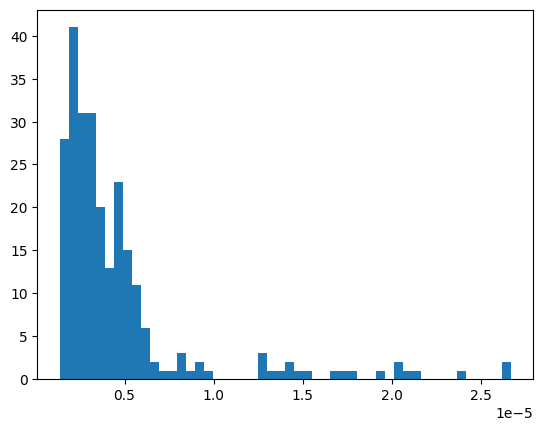

In [8]:
pred= model.predict(x_test)
los= keras.losses.mean_absolute_error(pred,x_test)
print(los.shape)
plt.hist(los,bins=50)

Text(0.5, 1.0, 'Plot of envelop')

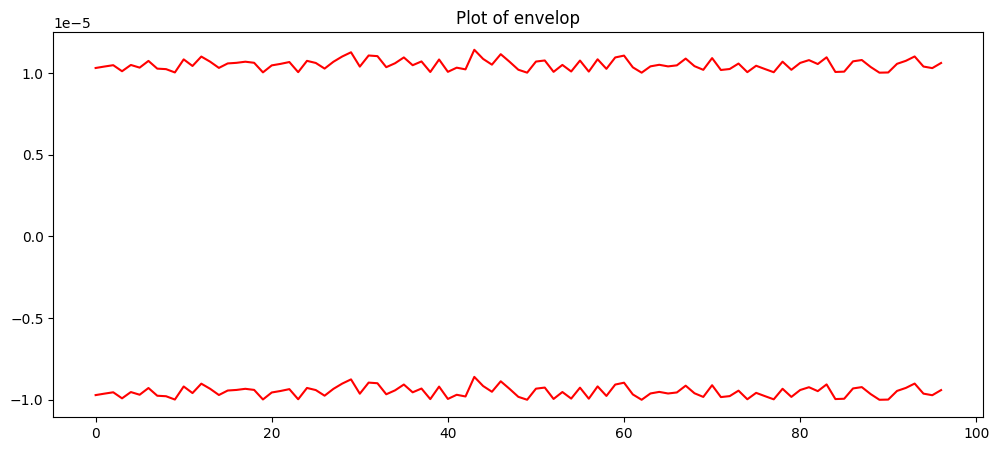

In [9]:
m=np.mean(los)
s=np.std(los)

#  creating threshold envelop
new_thresh1=pred+2.3*s;

new_thresh2=pred-2.3*s;
plt.figure(figsize=(12, 5))
plt.plot(new_thresh1[0],color="r")
plt.plot(new_thresh2[0],color="r")
plt.title("Plot of envelop")

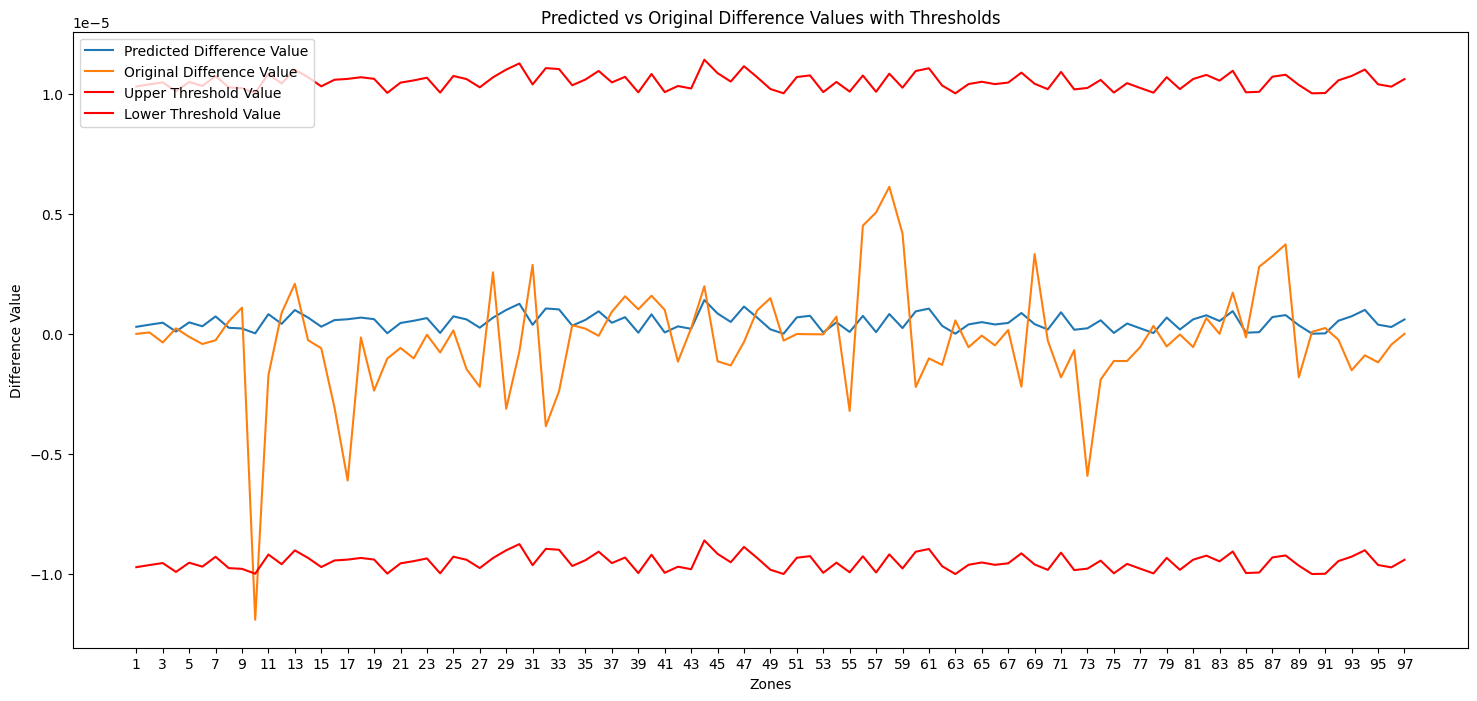

In [10]:
plt.figure(figsize=(18, 8))
plt.plot(pred[102], label="Predicted Difference Value")
plt.plot(x.iloc[102], label="Original Difference Value")
plt.plot(new_thresh1[102], color='r', label="Upper Threshold Value")
plt.plot(new_thresh2[102], color='r', label="Lower Threshold Value")
plt.legend(loc='upper left')

# Set ticks from 0 to 96 and labels from 1 to 97
plt.xticks(ticks=range(0, 97,2), labels=range(1, 98,2))

plt.xlabel('Zones')
plt.ylabel('Difference Value')
plt.title('Predicted vs Original Difference Values with Thresholds')
plt.show()


In [11]:
list1=[0*x for x in range(250)]

for i in range(250):
    temp=[]
    for j in range(97):
        data= x.iloc[i][j];
        if data> new_thresh1[i][j] or data< new_thresh2[i][j]:
            if list1[i]==0:
                list1[i]=j+1


In [12]:
correct=0       
for i in range(250):
    if list1[i]==df["intrusion_zone"][i]:
        correct+=1
        
print(f"{correct} correct cases = Model accuracy: {correct/2.50}%")

238 correct cases = Model accuracy: 95.2%


In [13]:
def prediction_zone(inp_trace):
    pred_trace=model.predict(inp_trace)
    new_thresh1=pred_trace[0]+2.3*s;
    new_thresh2=pred_trace[0]-2.3*s;
    for j in range(97):
        data=inp_trace.iloc[0][j]
        if data> new_thresh1[j] or data< new_thresh2[j]:
            return j+1

print("Zone of intrusion  :", prediction_zone(x.iloc[102:103]))
print("Zone of intrusion  :", prediction_zone(x.iloc[202:203]))
print("Zone of intrusion  :", prediction_zone(x.iloc[702:703]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Zone of intrusion  : 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Zone of intrusion  : 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Zone of intrusion  : 70


# CNN

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,Conv1D,Flatten,MaxPooling1D
from keras.optimizers import Adam

In [15]:

model = Sequential()
# model.add(Conv1D(90, kernel_size=5, strides=10,input_shape=(None,97),kernel_initializer= 'uniform',))
model.add(Conv1D(90, kernel_size=1,input_shape=(1,97)))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(25, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))

model.add(Conv1D(90, kernel_size=1))
model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(97,activation="sigmoid"))

model.summary()

/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 90)          │         8,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 45)          │         4,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 25)          │         1,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 45)          │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 90)          │         4,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 97)             │         8,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,202 (110.16 KB)

 Trainable params: 28,202 (110.16 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='mae')

In [17]:
x=df.iloc[:, 0:97]
y=df["isIntrusion"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,shuffle =False)
x_train.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z88,z89,z90,z91,z92,z93,z94,z95,z96,z97
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,-3.758139e-07,-2.056056e-07,-1.810260e-06,1.181334e-06,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-9.616060e-07,-3.501720e-07,2.454178e-06,-9.384168e-07,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,1.308622e-06,-1.009185e-06,-2.592479e-06,-1.474458e-06,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,-1.048949e-06,7.127258e-07,5.924098e-07,-6.060519e-07,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-6.893331e-07,2.709754e-08,-1.047473e-07,6.156120e-07,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09


In [18]:
x_train = x_train.to_numpy().reshape(-1,1, 97)
x_test = x_test.to_numpy().reshape(-1, 1, 97)

In [19]:
model.fit(x_train,x_train,batch_size=20,epochs=20, validation_data=(x_test, x_test))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4770 - val_loss: 0.1181
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0357 - val_loss: 1.6135e-05
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3459e-05 - val_loss: 1.0501e-05
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0704e-05 - val_loss: 1.0173e-05
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0419e-05 - val_loss: 9.9183e-06
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0166e-05 - val_loss: 9.6586e-06
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9082e-06 - val_loss: 9.3978e-06
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6506e-06 - val_loss: 9.1398e-06
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3967e-06 - val_loss: 8.8880e-06
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1495e-06 - val_loss: 8.6444e-06
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9109e-06 - val_loss: 8.4104e-0

In [20]:
pred= model.predict(x_test)
los= keras.losses.mean_absolute_error(pred,x_test)
print(los.shape)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(250, 250)


Text(0.5, 1.0, 'Plot of enevelop')

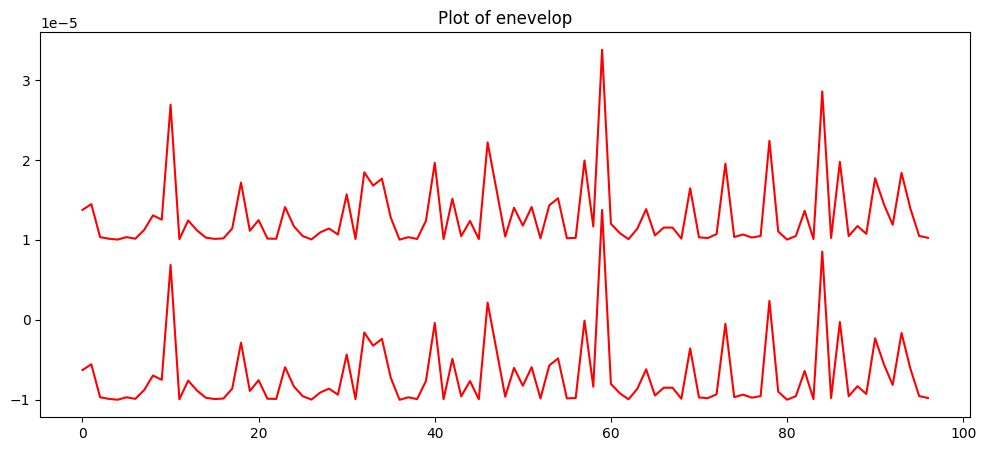

In [21]:
m=np.mean(los)
s=np.std(los)

#  creating threshold envelop
new_thresh1=pred+2.3*s;

new_thresh2=pred-2.3*s;
plt.figure(figsize=(12, 5))
plt.plot(new_thresh1[0],color="r")
plt.plot(new_thresh2[0],color="r")
plt.title("Plot of enevelop")

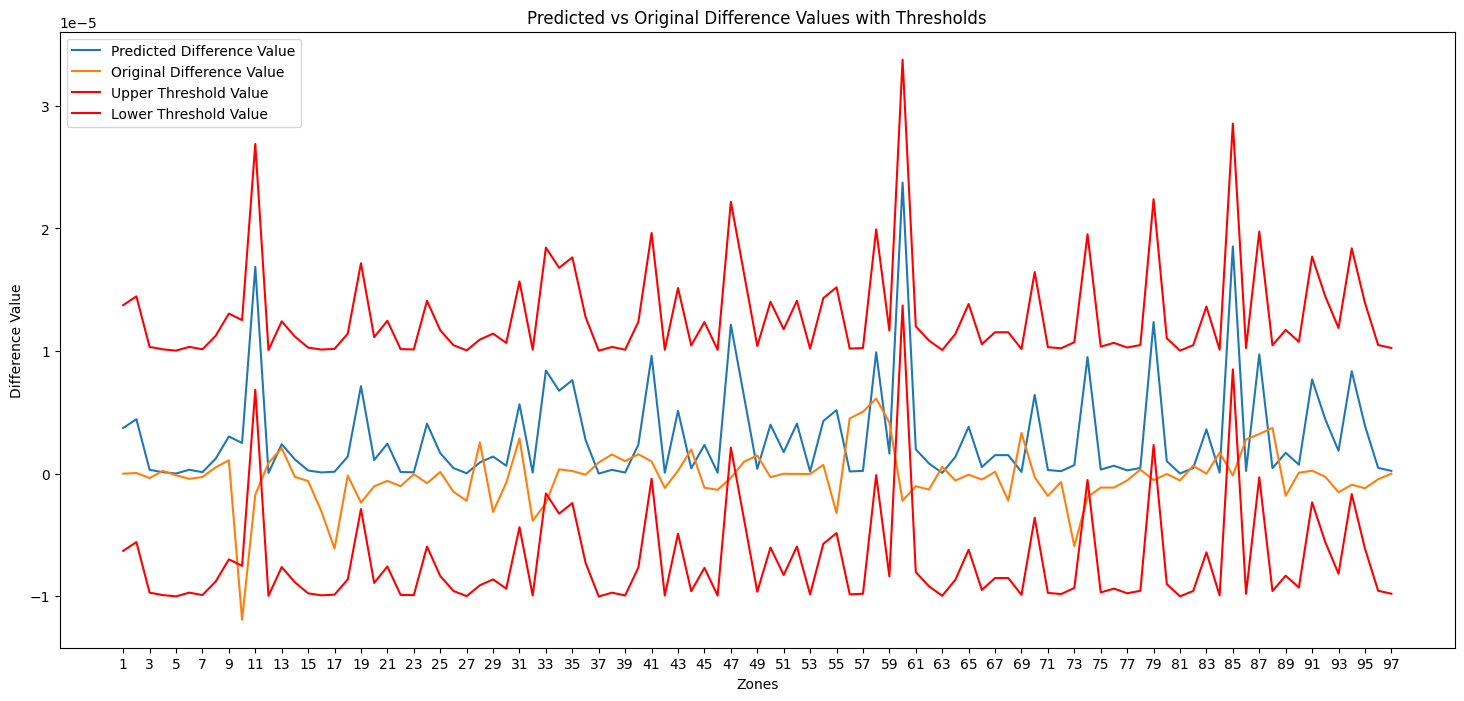

In [22]:
plt.figure(figsize=(18, 8))
plt.plot(pred[102], label="Predicted Difference Value")
plt.plot(x.iloc[102], label="Original Difference Value")
plt.plot(new_thresh1[102], color='r', label="Upper Threshold Value")
plt.plot(new_thresh2[102], color='r', label="Lower Threshold Value")
plt.legend(loc='upper left')

# Set ticks from 0 to 96 and labels from 1 to 97
plt.xticks(ticks=range(0, 97,2), labels=range(1, 98,2))

plt.xlabel('Zones')
plt.ylabel('Difference Value')
plt.title('Predicted vs Original Difference Values with Thresholds')
plt.show()


In [23]:
list1=[0*x for x in range(250)]

for i in range(250):
    temp=[]
    for j in range(97):
        data= x.iloc[i][j]
        if data> new_thresh1[i][j] or data< new_thresh2[i][j]:
            if list1[i]==0:
                list1[i]=j+1

In [24]:
correct=0       
for i in range(250):
    if list1[i]==df["intrusion_zone"][i]:
        correct+=1
        
print(f"{correct} correct cases = Model accuracy: {correct/2.50}%")

95 correct cases = Model accuracy: 38.0%


# CNN 2


In [25]:
x=df.iloc[:, 0:97]
x.shape
x=np.asarray(x)
x = x.reshape(1000, 1,97)

In [26]:

model = Sequential()
# model.add(Conv1D(90, kernel_size=5, strides=10,input_shape=(None,97),kernel_initializer= 'uniform',))
model.add(Conv1D(90, kernel_size=1,input_shape=(1,97)))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(25, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))

model.add(Conv1D(90, kernel_size=1))
model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(97,activation="sigmoid"))

model.summary()


/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1, 90)          │         8,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1, 45)          │         4,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1, 25)          │         1,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 45)          │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 1, 90)          │         4,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 97)             │         8,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,202 (110.16 KB)

 Trainable params: 28,202 (110.16 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='mae')  # mae --> mse

In [28]:
model.fit(x,x,batch_size=20,epochs=20)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - loss: 0.4631
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0020
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 1.3237e-05
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2373e-05
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1811e-05
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1256e-05
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0724e-05
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0222e-05
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7553e-06
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3256e-06
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9324e-06
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5741e-06 
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2486e-06 
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 7.9535e-06
Epoch 15/20
50/50 ━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


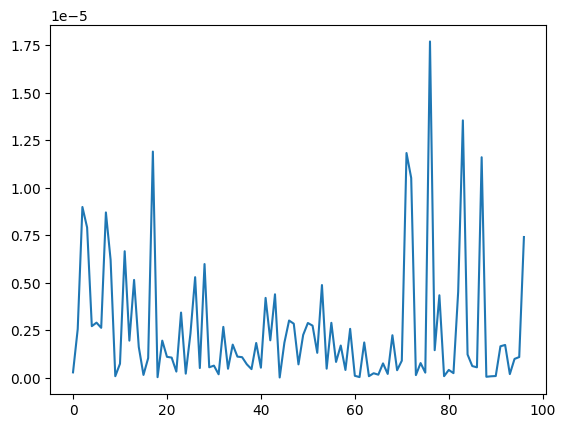

In [29]:
pred =model.predict(x)

plt.plot(pred[124])
plt.show()

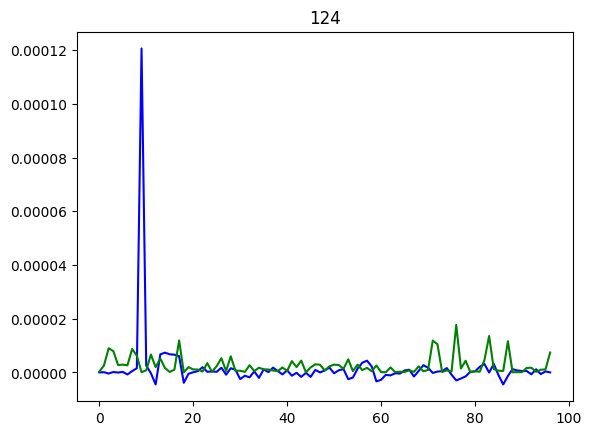

In [30]:
plt.plot(x[124][0],'b')
plt.plot(pred[124],"g")
plt.title("124")
plt.show()

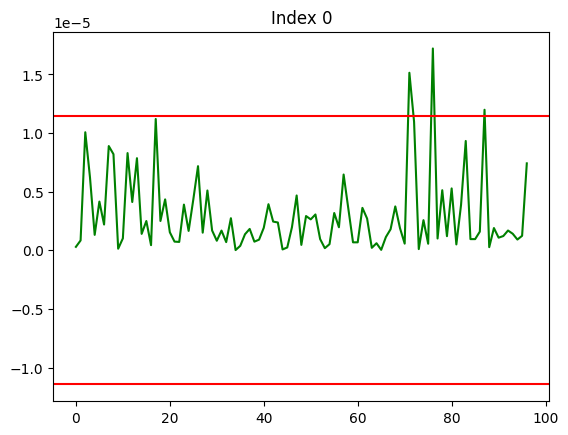

In [31]:
predicted_value = []
for index in range(len(pred)):
    list1 = list(pred[index])  # Predicted values
    list2 = list(x[index][0])  # Original values
    ans = []

    # Compute absolute differences
    for i in range(97):
        ans.append(abs(list1[i] - list2[i]))

    mean = np.mean(ans)
    std = np.std(ans)

    temp = []
    for d in range(97):
        temp.append(abs(list1[d] - list2[d]))
    
    predicted_value.append(temp)  # Store the result
    
    # Plot for just the first index
    if index == 0:  
        plt.plot(temp, "g")  # Green for the absolute difference
        plt.axhline(y=mean + 2.5 * std, color='r', linestyle='-', label="Upper Threshold")
        plt.axhline(y=-(mean + 2.5 * std), color='r', linestyle='-', label="Lower Threshold")
        plt.title(f"Index {index}")
        plt.show()

In [32]:
ans=[0 for x in range(1000)]
thresh= mean+5*std
for i in range(1000):
    for j in range(97):
        if predicted_value[i][j]>thresh:
            if(ans[i]==0):
                ans[i]=j+1

In [33]:
correct=0
for i in range(750,950):
    if ans[i]==df.iloc[i,100]:
        correct+=1
    
print(f"{correct} correct cases = Model accuracy: {correct/2.50}%")

187 correct cases = Model accuracy: 74.8%
